All questions in this homework will be graded manually. 

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as scs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn import tree

## Q1 (1 pt)

Consider the data in the file 'heart.csv'. The column 'target' corresponds to the class label. 
Use the train_test_split() function in sklearn to randomly split the dataset into 70% training set and 30% test set, by setting test_size=0.30, shuffle=True, and  rnd_state=42 in the train_test_split() function. 

Fix the train and test sets obtained using this setting. You will use the same test set for calculating the accuracy in the following questions. 

In [2]:
# get_train_test_split(filename) takes as input 
# the filename to read in data from, the sample size, test set size and random state.
# Returns the train and test splits obtained from the sampled data with the provided random state. 

test_proportion = 0.3

def get_train_test_split(filename, rnd_state):
    
    df = pd.read_csv(filename)
    X = df.loc[:, df.columns != 'target']
    y = df['target']
    return train_test_split(X, y, test_size=0.30, shuffle=True, random_state=rnd_state)
    
# For example,
get_train_test_split('heart.csv',42)
# -> (X_train, X_test, y_train, y_test)


[     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 124   39    0   2        94   199    0        1      179      0      0.0   
 72    29    1   1       130   204    0        0      202      0      0.0   
 15    50    0   2       120   219    0        1      158      0      1.6   
 10    54    1   0       140   239    0        1      160      0      1.2   
 163   38    1   2       138   175    0        1      173      0      0.0   
 155   58    0   0       130   197    0        1      131      0      0.6   
 97    52    1   0       108   233    1        1      147      0      0.1   
 68    44    1   1       120   220    0        1      170      0      0.0   
 229   64    1   2       125   309    0        1      131      1      1.8   
 37    54    1   2       150   232    0        0      165      0      1.6   
 16    58    0   2       120   340    0        1      172      0      0.0   
 126   47    1   0       112   204    0        1      143      0      0.1   

Run the following cell to initialize the train and test splits. 

In [3]:
X_train, X_test, y_train, y_test = get_train_test_split('heart.csv',42)

## Q2 (2 pts)

Now, write a method that takes the train and test datasets obtained above, and fits the specified model type using the training data. The model_type argument can be either 'NBC' (Naive Bayes Classifier), 'P' (Perceptron), 'DT' (Decision Tree). 
For NBC, use MultinomialNB() function in sklearn. 
For P, use Perceptron(tol=1e-3) in sklearn. 
For DT, use DecisionTreeClassifier() in sklearn.

Using the learned model, return the accuracy on the test data. 

In [7]:
# get_accuracy(X_train, X_test, y_train, y_test, model_type) takes as input 
# the training and test splits: X_train, X_test, y_train, y_test, and
# the model type ('NBC' or 'P' or 'DT')
# Returns the accuracy on the test split by training the given model type on train splits. 

def get_accuracy(X_train, X_test, y_train, y_test, model_type):
    
    if model_type == 'NBC':
        gnb = MultinomialNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        return (y_test == y_pred).sum() / X_test.shape[0]
    elif model_type == 'P':
        clf = Perceptron(tol=1e-3)
        clf = clf.fit(X_train, y_train)
        return clf.score(X_test, y_test)
    elif model_type == 'DT':
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        return clf.score(X_test, y_test)
    
# For example,
print(get_accuracy(X_train, X_test, y_train, y_test, 'NBC'))
# varies around -> 0.7912087912087912

print(get_accuracy(X_train, X_test, y_train, y_test, 'P'))
# varies around -> 0.7362637362637363

print(get_accuracy(X_train, X_test, y_train, y_test, 'DT'))
# varies around -> 0.7252747252747253

0.7912087912087912
0.7362637362637363
0.7252747252747253


## Q3 (2 pts)

Use the train and test datasets obtained from the get_train_test_split() function in Q1. Given a list of proportions, sample (without replacement) different proportions of the training data. For each sample, fit the specified model_type. 

Then apply the model to the data indicated by the data_type argument and record accuracy. When data_type='train' apply the model to the sampled training data, when data_type='test' apply the model to the full test set (i.e., do not sample the test set), when data_type='both' apply the model to both the training set and the test set. 

Return a dictionary that maps the sample size (key) used to fit the model to the corresponding accuracy on the specified data_type (value). Note when data_type='both', store the training and test accuracies as a tuple. 

For generating the samples, you can use np.random.choice().

In [8]:
# get_learning_curve(filename, rnd_state, proportions, model_type, data_type) takes as input 
# the filename to read in data from, the random state, a list of proportions, 
# the model type ('NBC' or 'P' or 'DT'), and the data type ('train' or 'test' or 'both').
# Returns a dictionary with key as the size of the sample used to fit the model,
# and value as the corresponding accuracy (a floating point value for data_type = 'train' or 'test', and 
# a tuple of accuracies for data_type='both') on the specified data. 

def get_learning_curve(filename, rnd_state, proportions, model_type, data_type):
    
    X_train, X_test, y_train, y_test = get_train_test_split(filename, rnd_state)
    result = {}
    for p in proportions:
        x = X_train.sample(frac=p)
        y = y_train[x.index]
        if data_type == 'train':
            acc = get_accuracy(x, x, y, y, model_type)
            result[x.shape[0]] = acc
        elif data_type == 'test':
            acc = get_accuracy(x, X_test, y, y_test, model_type)
            result[x.shape[0]] = acc
        elif data_type == 'both':
            acc = (get_accuracy(x, x, y, y, model_type), get_accuracy(x, X_test, y, y_test, model_type))
            result[x.shape[0]] = acc
    return result
# For example,
get_learning_curve('heart.csv', 42, [0.1, 0.3, 0.5, 0.7, 0.9], 'NBC', 'both')
# -> Dictionary
# 21: (..., ...),
# 63: (..., ...),
# 106: (..., ...),
# 148: (..., ...),
# 190: (..., ...)}


{21: (0.8095238095238095, 0.7692307692307693),
 64: (0.8125, 0.8131868131868132),
 106: (0.7169811320754716, 0.8241758241758241),
 148: (0.7567567567567568, 0.7802197802197802),
 191: (0.7591623036649214, 0.8021978021978022)}

## Q4 (2 pt)

Write a function that calculates the average accuracy and standard error over a given number of trials. For each trial, call get_train_test_split() as in Q1 to generate a new train/test split, then call get_learning_curve() with the specified proportions. Set the 'random_state' parameter to trial number to faciliate testing, i.e., for the first trial use random_state=0, for the second sample use random_state=1, etc.

Return a dictionary with key as the size of the sample used to fit the model, and the value as a tuple whose first element is the average accuracy, and second element is the standard error. Note, when data_type='both' the value should be a tuple with the avg/stderr for the training and test data.

In [9]:
# get_average_accuracy(filename, rnd_state, model_type, proportions, num_trials, data_type) takes as input 
# the filename to read in data from, the random state, the model type ('NBC' or 'P' or 'DT'), 
# a list of proportions, the number of trials, 
# and the type of data to calculate accuracy on ('train' or 'test' or 'both').
# Returns a dictionary with key as the size of the sample used to fit the model, and the value as a tuple with:
# the first element as the average accuracy, and the second element as the standard error. 
# Note, when data_type='both' the value should be a tuple with the average accuracy and standard error
# for both the training and test data.

from collections import defaultdict
def get_average_accuracy(filename, rnd_state, model_type, proportions, num_trials, data_type):
    
    results = defaultdict(list)
    for i in range(num_trials):
        result = get_learning_curve(filename, i, proportions, model_type, data_type)
        for n in result:
            results[n].append(result[n])
    
    avg_acc = {}
    if data_type == 'train' or data_type == 'test':
        for n in results:
            acc = np.array(results[n])
            avg_acc[n] = (np.mean(acc), np.std(acc))
    elif data_type == 'both':
        for n in results:
            train_acc = []
            test_acc = []
            for i in results[n]:
                train_acc.append(i[0])
                test_acc.append(i[1])
            train_acc = np.array(train_acc)
            test_acc = np.array(test_acc)
            avg_acc[n] = ((np.mean(train_acc), np.std(train_acc)), (np.mean(test_acc), np.std(test_acc)))
            
    return avg_acc
    
# For example,
get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.3, 0.5, 0.7, 0.9], 10, 'train')
# -> Dictionary


{21: (0.8476190476190476, 0.05947617141331806),
 64: (0.7984375, 0.026562500000000003),
 106: (0.7650943396226415, 0.022104480214830188),
 148: (0.7594594594594594, 0.02324952774876387),
 191: (0.7596858638743456, 0.012488859101441445)}

## Q5 (5 pts)

(a) Consider the following proportions: [0.1, 0.2, 0.4, 0.6, 0.8]. Plot the learning curve for NBC showing the average accuracy and the standard error for 10 trials as a function of training set sample size. 

[42, 127, 21, 85, 170]


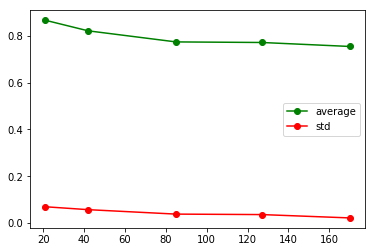

In [17]:
avg_acc = get_average_accuracy('heart.csv', 42, 'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train')
sample_size = []
avg = []
std = []
for n in avg_acc:
    sample_size.append(n)
    avg.append(avg_acc[n][0])
    std.append(avg_acc[n][1])

df = pd.DataFrame(
    {'sample_size': sample_size,
     'avg': avg,
     'std': std
    })
df.sort_values(by=['sample_size'], inplace=True)

fig, ax = plt.subplots()
ax.plot(df['sample_size'], df['avg'], 'go-', label='average')
ax.plot(df['sample_size'], df['std'], 'ro-', label='std')
plt.legend()
plt.show()

(b) Plot the same learning curve as Q5a, but for Perceptron.

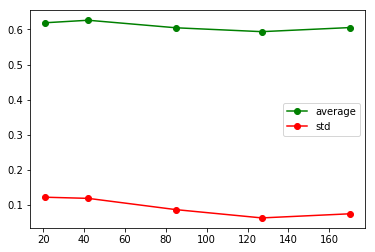

In [11]:
avg_acc = get_average_accuracy('heart.csv', 42, 'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train')
sample_size = []
avg = []
std = []
for n in avg_acc:
    sample_size.append(n)
    avg.append(avg_acc[n][0])
    std.append(avg_acc[n][1])
df = pd.DataFrame(
    {'sample_size': sample_size,
     'avg': avg,
     'std': std
    })
df.sort_values(by=['sample_size'], inplace=True)

fig, ax = plt.subplots()
ax.plot(df['sample_size'], df['avg'], 'go-', label='average')
ax.plot(df['sample_size'], df['std'], 'ro-', label='std')
plt.legend()
plt.show()

(c) Plot the same learning curve as Q5a, but for Decision Tree Classifier.

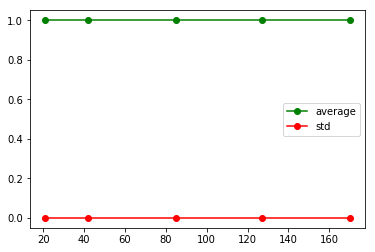

In [33]:
avg_acc = get_average_accuracy('heart.csv', 42, 'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train')
sample_size = []
avg = []
std = []
for n in avg_acc:
    sample_size.append(n)
    avg.append(avg_acc[n][0])
    std.append(avg_acc[n][1])

df = pd.DataFrame(
    {'sample_size': sample_size,
     'avg': avg,
     'std': std
    })
df.sort_values(by=['sample_size'], inplace=True)

fig, ax = plt.subplots()
ax.plot(df['sample_size'], df['avg'], 'go-', label='average')
ax.plot(df['sample_size'], df['std'], 'ro-', label='std')
plt.legend()
plt.show()

(d) Based on the learning curves obtained in (5a), (5b), and (5c), state which of three models overfits the training data. Justify your answer.

### YOUR ANSWER HERE: 

(e) Create a single learning curve plot comparing the accuracies of the three models on the test set for training set proportions [0.1, 0.2, 0.4, 0.6, 0.8].

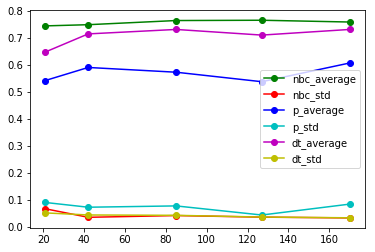

In [13]:
nbc_acc = get_average_accuracy('heart.csv', 42, 'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test')
p_acc = get_average_accuracy('heart.csv', 42, 'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test')
dt_acc = get_average_accuracy('heart.csv', 42, 'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test')

sample_size = []
nbc_avg, p_avg, dt_avg = [], [], []
nbc_std, p_std, dt_std= [], [], []
for n in nbc_acc:
    sample_size.append(n)
    nbc_avg.append(nbc_acc[n][0])
    nbc_std.append(nbc_acc[n][1])
for n in p_acc:
    p_avg.append(p_acc[n][0])
    p_std.append(p_acc[n][1])
for n in dt_acc:
    dt_avg.append(dt_acc[n][0])
    dt_std.append(dt_acc[n][1])

df = pd.DataFrame(
    {'sample_size': sample_size,
     'nbc_avg': nbc_avg,
     'nbc_std': nbc_std,
     'p_avg': p_avg,
     'p_std': p_std,
     'dt_avg': dt_avg,
     'dt_std': dt_std
    })
df.sort_values(by=['sample_size'], inplace=True)
    
plt.plot(df['sample_size'], df['nbc_avg'], 'go-', label='nbc_average')
plt.plot(df['sample_size'], df['nbc_std'], 'ro-', label='nbc_std')
plt.plot(df['sample_size'], df['p_avg'], 'bo-', label='p_average')
plt.plot(df['sample_size'], df['p_std'], 'co-', label='p_std')
plt.plot(df['sample_size'], df['dt_avg'], 'mo-', label='dt_average')
plt.plot(df['sample_size'], df['dt_std'], 'yo-', label='dt_std')

plt.legend()
plt.show()

## Q6 (2 pts)

(a) Given the results in Q5e, choose one training set size (e.g., 50) and formulate a hypothesis about the observed performance difference between any two of the models (NBC/P/DT).

###  State H0 and H1 for scoreNB vs. scoreP

### H0: scoreNB = scoreP 
### H1: scoreNB != scoreP

(b) Test your hypothesis using a paired t-test with significance level alpha = 0.05. Print out the resulting pvalue and your accept/rejct decision.

Note: you need to test the hypothesis using the results from each random trial rather than the average results returned by get_average_accuracy().

In [30]:
# apply a paired t-test to results
import scipy.stats as st 

# set size as 21
sizes = 21
scoresTR = []
scoresTE = []

numTrials = 10
for i in range(sizes):
    totalScoreTR = 0
    totalScoreTE = 0
    
    for j in range(numTrials):
        # learn the model
        modelNB = MultinomialNB() # use default parameters
        modelNB.fit(X_train, y_train)    # apply the model
        tmpScore = modelNB.score(X_test,y_test)
        totalScoreTE = totalScoreTE + tmpScore
        clf = Perceptron(tol=1e-3)
        clf = clf.fit(X_train, y_train)
        tmpScore2 = clf.score(X_test, y_test)
        totalScoreTR = totalScoreTR + tmpScore2

    scoresTE.append(totalScoreTE)
    scoresTR.append(totalScoreTR)

t, p = st.ttest_rel(scoresTR, scoresTE, nan_policy='omit')
if p < 0.05:
    result = 'reject H0'
else:
    result = 'accept H0'
print('Paired pval=' + str(p), result)

Paired pval=2.378104348278086e-309 reject H0


(c) Now, test the hypothesis that you made in Q6a over all training set sizes. Note: Since you consider multiple sample sizes, you need to apply Bonferroni correction for testing the hypothesis. 

Print out the pvalue and accept/decision for each sample size. 

In [39]:

sizes = 21
scoresTR = []
scoresTE = []

numTrials = 10
for i in range(sizes):
    totalScoreTR = 0
    totalScoreTE = 0
    
    for j in range(numTrials):
        # learn the model
        modelNB = MultinomialNB() # use default parameters
        modelNB.fit(X_train, y_train)    # apply the model
        tmpScore = modelNB.score(X_test,y_test)
        totalScoreTE = totalScoreTE + tmpScore
        clf = Perceptron(tol=1e-3)
        clf = clf.fit(X_train, y_train)
        tmpScore2 = clf.score(X_test, y_test)
        totalScoreTR = totalScoreTR + tmpScore2

    scoresTE.append(totalScoreTE/numTrials)
    scoresTR.append(totalScoreTR/numTrials)

t, p = st.ttest_rel(scoresTR, scoresTE, nan_policy='omit')
if p < 0.05:
    result = 'reject H0'
else:
    result = 'accept H0'
print('Paired pval=' + str(p), result)

Paired pval=1.87607e-319 reject H0


## Q7 (2 pts)

(a) Use the data in the file 'heart.csv', apply 10 fold cross validation and report (print) the average accuracy for each the three models (NBC, P and DT).

In [80]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv('heart.csv')
X = df.loc[:, df.columns != 'target']
y = df['target']

nbc = MultinomialNB()
nbc_scores = cross_val_score(nbc, X, y, cv=10)
nbcmean = np.mean(nbc_scores)
print('NBC average accuracy:'+ str(nbcmean))

p = Perceptron(tol=1e-3)
p_scores = cross_val_score(p, X, y, cv=10)
pmean = np.mean(p_scores)

print('P average accuracy:'+ str(pmean))

dt = tree.DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y, cv=10)
DTmean = np.mean(dt_scores)
print('DT average accuracy:'+ str(DTmean))

NBC average accuracy:0.7449128661475715
P average accuracy:0.6362810530218761
DT average accuracy:0.7778383388950687


(b) Formulate a hypothesis about the performance difference between any two of the models, observed in Q7a.

###  State H0 and H1 for nbc_scores vs. p_scores

### H0: nbc_scores = p_scores
### H1: nbc_scores != p_scores

(c) Test your hypothesis using a paired t-test with significance level alpha = 0.05. Print out the resulting pvalue and your accept/rejct decision.

Note: you need to test the hypothesis using the results from each cross-validation trial rather than the average results reported in Q7a.

In [28]:
from sklearn.model_selection import cross_val_score
df = pd.read_csv('heart.csv')
X = df.loc[:, df.columns != 'target']
y = df['target']

nbc = MultinomialNB()
nbc_scores = cross_val_score(nbc, X, y, cv=10)

p = Perceptron(tol=1e-3)
p_scores = cross_val_score(p, X, y, cv=10)

t, p = st.ttest_rel(nbc_scores, p_scores, nan_policy='omit')
if p < 0.05:
    result = 'reject H0'
else:
    result = 'accept H0'
print('Paired pval=' + str(p), result)

[0.80645161 0.67741935 0.70967742 0.80645161 0.87096774 0.66666667
 0.76666667 0.8        0.62068966 0.72413793]
[0.64516129 0.5483871  0.5483871  0.70967742 0.87096774 0.66666667
 0.53333333 0.63333333 0.55172414 0.65517241]
Paired pval=0.0014274289246479458 reject H0
